# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
    
data

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [22]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [25]:
# data.loc to filter DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [26]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [27]:
# Fresh filter
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [28]:
# Frozen filter
frozen_q1 = 742.250000
display(data.loc[data.Frozen < frozen_q1, :].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [8]:
# Frozen
frozen_q3 = 3554.250000
display(data.loc[data.Frozen > frozen_q3, :].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


Indices: -[43, 12, 39].


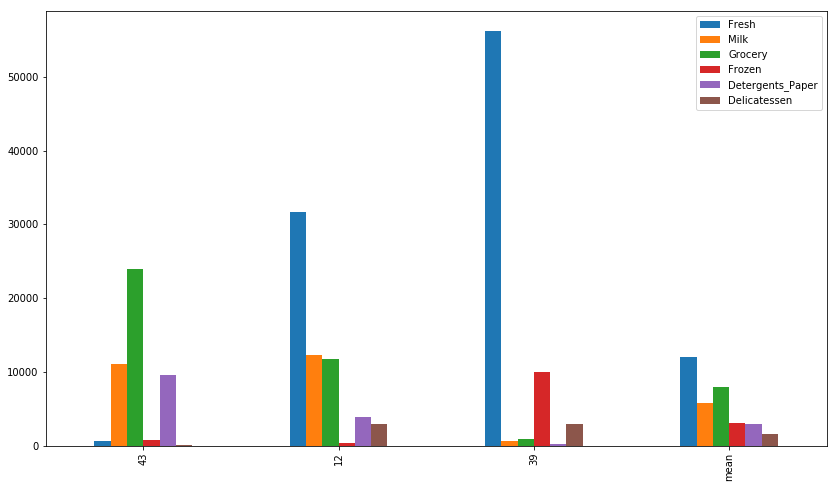

In [30]:
indices = [43, 12, 39]


samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

### Choosing values where there's significant difference between categories
#43 -- high grocery and significantly low Fresh
#12 -- low frozen and significantly higer Fresh
#39 -- high frozen and significantly lower Detergens_Paper

#plotting
mean_data = data.describe().loc['mean', :]

# adding means
samples_barG = samples.append(mean_data)
print("Indices: -{}.".format(indices))
# indexes
samples_barG.index =  indices+['mean']

# bar plot
samples_barG.plot(kind='bar', figsize=(14,8))

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [31]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43,12,39]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

0 -- Cafe, as there's very low spending on fresh, frozen and delicatessen. Most spending has been doen on Milk(Milk products; various kind of coffees, shakes) and Grocery (some side food served or ordered with milk beverages). Delicatessen in this case can be specailly packed imported tea and coffee blends (as is the case with many cafes)

1 -- Restaurant. Most spending is on Fresh, Milk and Grocery. Usually, restaurants tend to keep fresh items, and a mix of milk products that go along dishes they serve or as separte drinks. Restaurants also don't tend to keep frozen items that much.

2 -- Vegetable/Fruit or Fresh Items Retailer. Most spending is on Fresh category. Such shops keep a great stock fresh vegetables, fruits, meat (frozen or fresh). Other categories aren't that significant in comparison.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [32]:
#importing necessary packages; for train-test split and regression resepctively
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Dropping "Milk", so as to keep it as target variable
new_data = data.drop(['Milk'],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Milk'],test_size=0.25,random_state=101)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print(score)

0.295714384441


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
#Now using a loop to check other categories as target variable: -
target_vars = list(data.columns)


# Looping through each target variable
for var in target_vars:

    # local copy of each subset having a dropped column from current iteration
    new_data = data.drop([var], axis = 1)
    
    #Fearures
    new_feature = pd.DataFrame(data.loc[:, var])

    # Splitting
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)
    # Decision Tree Regeressor
    regressor = DecisionTreeRegressor(random_state=42)
    # Fit
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    print('R Square score for {} as dependent variable: {}'.format(var, score))

R Square score for Fresh as dependent variable: -0.38574971020407384
R Square score for Milk as dependent variable: 0.15627539501732116
R Square score for Grocery as dependent variable: 0.6818840085440834
R Square score for Frozen as dependent variable: -0.21013589012491396
R Square score for Detergents_Paper as dependent variable: 0.27166698062685013
R Square score for Delicatessen as dependent variable: -2.254711537203931


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

As you can see in my first regression, using only milk as a target variable I get a low R square score of .29, it means only 29% of varirance is explained by regression which in simple words imply, this variable is difficult to predict given the feature set. Hence it's an important feature to consider when defining various customer segments.

Along the same line, when I try to get R-square scores for each category variable, I get various low scores. I get negative scores for Fresh, Frozen, and Delcatessen. It means these are not at all explained by regression, and therefore are of keen interest to me for defining customer segments. Compared to these three negative values, we get some positive values as well, but on a scale of 0-1, they still fall under a low score range with the exception of Grocery (.68 being subjective and depending on domain can be low as well as a high value). As of now we will consider Grocery as being an important one as well.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

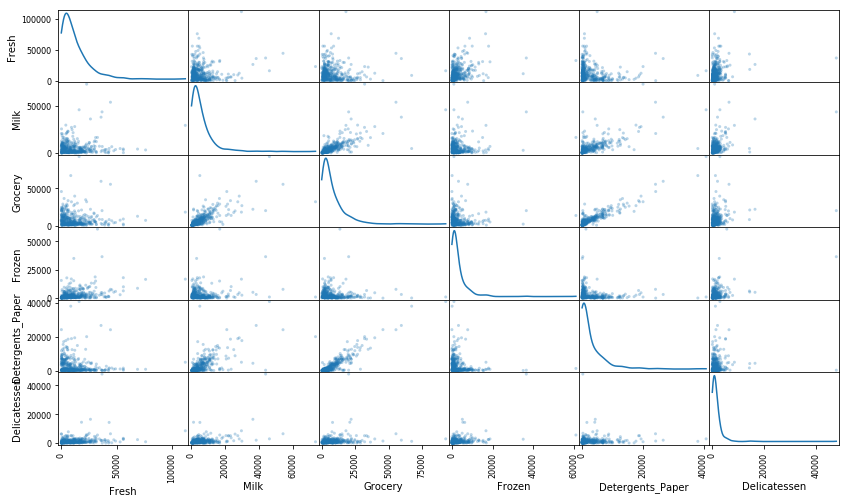

In [34]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Scatter matrix interpretation:

### Scatter matrix interpretation:

Most of the distributions have high density on the left side, hence we can say that they are right skewed distributions. Moreover, there's significant difference between mean and max (from the stats summary shown previously), and this further corroborates our inference of these distributions being right skewed, which do contain outliers. Also, as can be seen from stats summary median is less than the mean, which further confirms distrbutions as positively skewed.

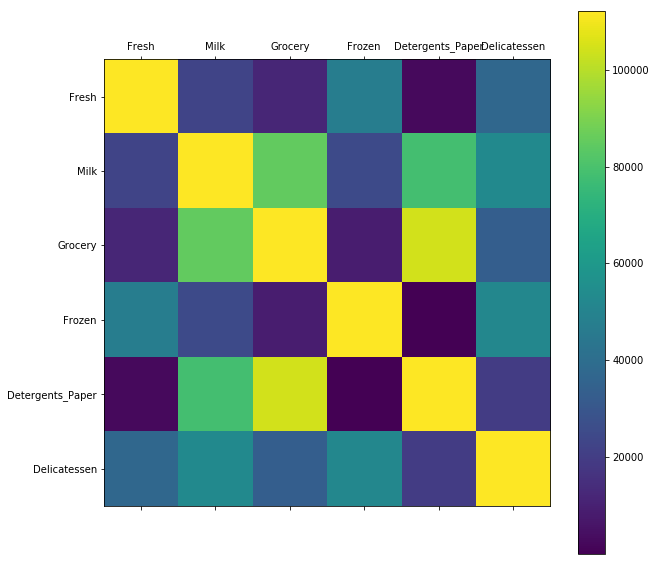

In [35]:
#Correlation Matrix
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(data)

#As can be seen in the scale on the right side; the more the (green to yellow), the higer the correlation

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

As can be seen by scatter matrix and correlation matrix: -

-- Milk seems to have a correlation(moderate) with Grocery.

-- Grocery seems to have a correlation(strong) with Detergents_Paper

-- Detergent_Papers seems to have a correlation(moderate) with Milk

As it was the case with R square scores, we can assume that Gorcery has no significant affect on identifying customer segments. Intuitively, grocery is common acorss all of our inferred establishments, hence we can ignore Grocery from being a considerable parameter for identifying customer segments.

How is the data for those features distributed?
The distribution of these features have high density on the left side, hence we can say that they are right skewed distributions. Moreover, there's significant difference between mean and max (from the stats summary shown previously). Mean is greater than the median, hence distribution is postively skewed. As can be seen again with summary for features -



In [36]:
#As we can see the median is less than the mean for features
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


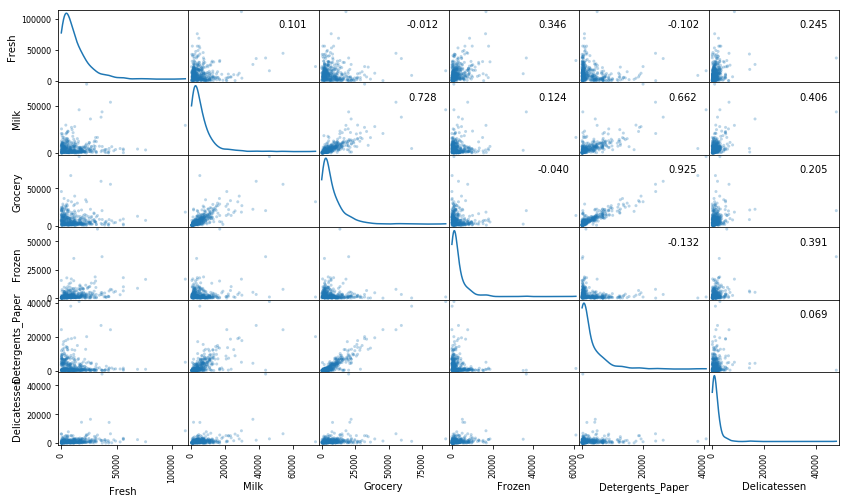

In [37]:
#Correlation with the plot
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

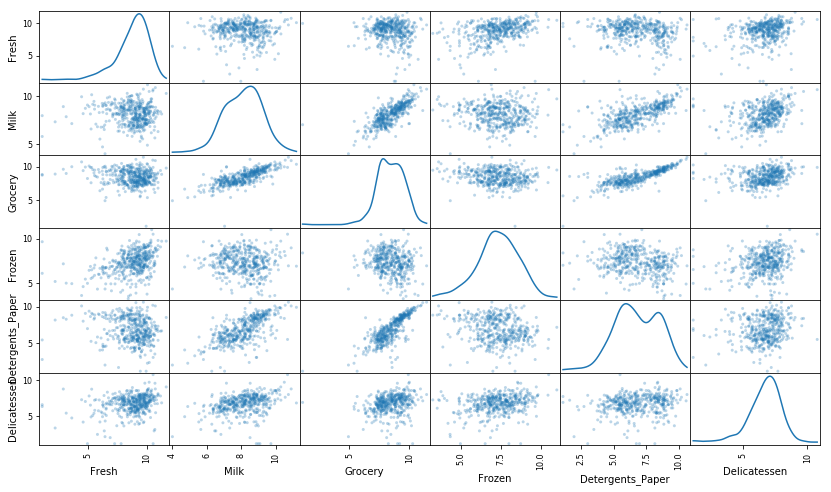

In [38]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [39]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


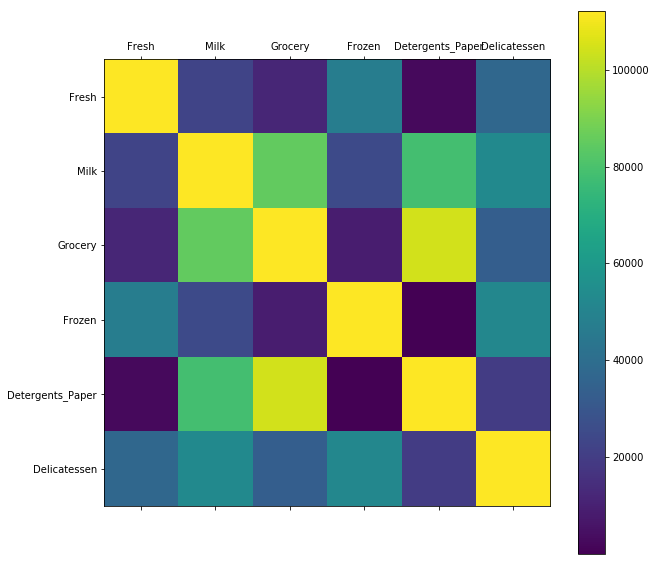

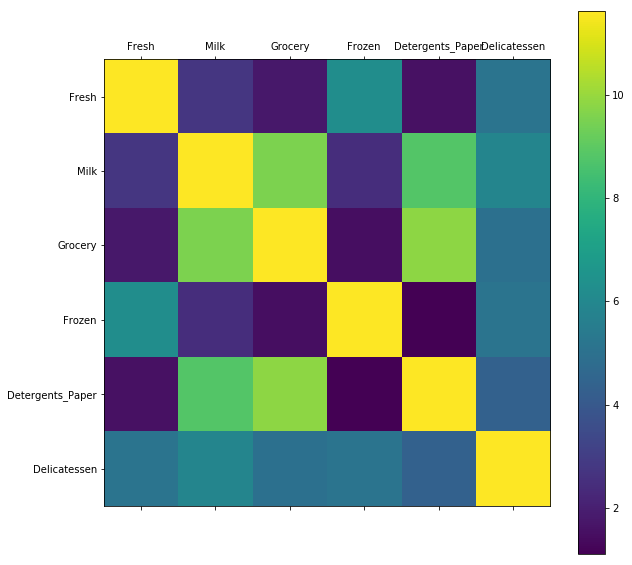

In [40]:
plot_corr(data)
plot_corr(log_data)

# Observation

Grocery seems to have a weaker correlation with Detergents_Paper.

Detergent_Paper and Milk seems to have almost same amount of correlation.

Grocery seems to have a slightly better correlation with Milk (ligter green as per right-side scale).




### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [41]:
import itertools
#to be used to fill up list
outliers_List=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    print("Q1 value {} for {}".format(Q1,feature))
    print("Q3 value {} for {}".format(Q3,feature))
    print("Step value {}".format(step))
    print("Left side min value {}".format(Q1-step))
    print("Right side min value {}".format(Q3+step))
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers_Rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    #To display
    outliers_List.append(list(outliers_Rows.index)) # Concerned only with indexes as we'll do comparison

# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(itertools.chain.from_iterable(outliers_List))

# Unique Outliers
uniq_Outliers = list(set(outliers))

# Duplicate outliers
dup_Outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
#Unique print
print('Unique Outliers : ', uniq_Outliers)
print('Total Unique Outliers : ', len(uniq_Outliers))
#Duplicate print
print('Duplicate Outliers : ', dup_Outliers)
print('Total Duplicate Outliers : ', len(dup_Outliers))
# Removing Duplicate ones as they offer no insight so as to segregate customers
good_data = log_data.drop(log_data.index[dup_Outliers]).reset_index(drop = True)

print('New Data Shape : ', good_data.shape)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Q1 value 8.048058702214819 for Fresh
Q3 value 9.73706394795268 for Fresh
Step value 2.533507868606793
Left side min value 5.514550833608026
Right side min value 12.270571816559475
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Q1 value 7.334981240042021 for Milk
Q3 value 8.880480088587671 for Milk
Step value 2.318248272818475
Left side min value 5.016732967223546
Right side min value 11.198728361406147
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Q1 value 7.67461620137308 for Grocery
Q3 value 9.27385367723784 for Grocery
Step value 2.3988562137971394
Left side min value 5.275759987575941
Right side min value 11.67270989103498
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Q1 value 6.609677749172153 for Frozen
Q3 value 8.175896083178294 for Frozen
Step value 2.3493275010092116
Left side min value 4.260350248162942
Right side min value 10.525223584187506
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Q1 value 5.548101424791306 for Detergents_Paper
Q3 value 8.274340598750195 for Detergents_Paper
Step value 4.0893587609383335
Left side min value 1.4587426638529726
Right side min value 12.363699359688528
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Q1 value 6.011874656932535 for Delicatessen
Q3 value 7.506728426547161 for Delicatessen
Step value 2.2422806544219394
Left side min value 3.7695940025105954
Right side min value 9.7490090809691
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Unique Outliers :  [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Total Unique Outliers :  42
Duplicate Outliers :  [128, 65, 66, 75, 154]
Total Duplicate Outliers :  5
New Data Shape :  (435, 6)


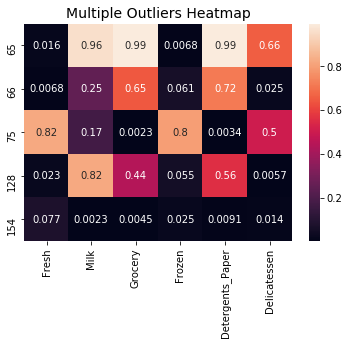

In [42]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[65, 66, 75, 128, 154]]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Yes, there are data points for which more than one feature has outliers. Duplicate Outliers :  [128, 65, 66, 75, 154].

We are removing only these five duplicate values as they offer no value to our segmentation. Intuitively, they are outliers across categories, and therefore consistent accorss those categories which doesn't lead to any conclusion for segmentation. We also get same results from the heat map shown above. As the dark one beign an outlier and common accorss more than one category.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

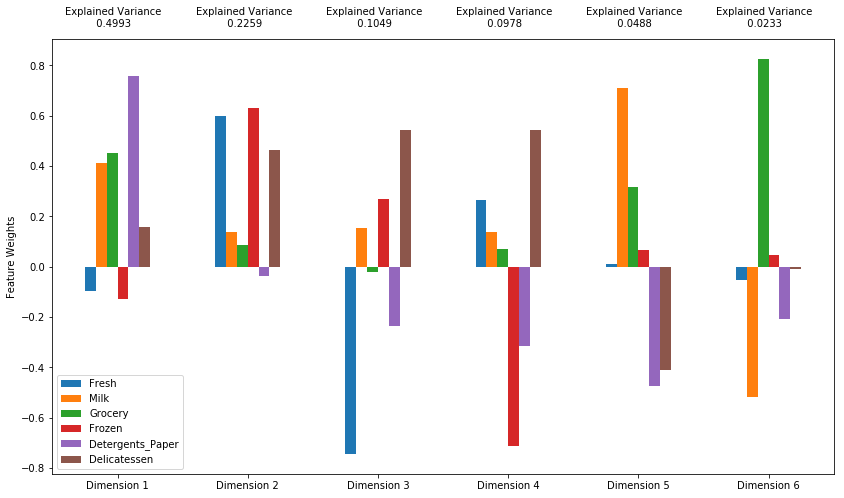

In [52]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results)

display(pca_results['Explained Variance'].cumsum())




### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

First and Second in total account for nearly 72% of variance explanation (.4993 + .2259 = 72.52)

First four componenet variance => .4993 + .2259 + .1049+ .0978 = .9279, about 93% rounded off

Components: -


1). First Component-
This component has significant increases in spending for: -"Milk", "Grocery" and "Detergents_Paper". It means they are correlated, and an increase in one will see an increasing effect in other two, and this component seems to increase with these three as well. This component has negative effect for "Fresh" and "Frozen" (consequently decrease in Fresh will see decrease in Frozen as well) First component explains the most variance among three highest categories, i.e. "Milk", "Grocery" and "Detergents_Paper". Intuitively this does try to separate customer segments based on one category of (Milk, Grocery, Detergents_paper) and (Fresh and Frozen). There's also a slight yet considerable postive correlation of Delicatessen with (Milk, Grocery, and Detergents_paper).
   
    

2). Second Component-
This component has significant increases in spending for: -"Fresh", "Frozen", "Delicatessen". With slight postive correlation with Milk and Grocery, this component increases with these higher weight categories. This component also shows one separated out category in negative for Detergents_paper; which in my opinion doesn't warrant a clear segmentation.  

   
   
3). Thrid Component-
This component has increase in spending for: -"Delicatessen" with slight yet considerable correlation with Frozen and Milk (in order of relative weights). This component increases with increase in "Delivatessen", but this is not that important, as we can see it tries to separte out the category with negative weight for Fresh and Detergents_Paper (perhaps a restaurant) and the one with positive weights (Delicatessen mainly).



4). Fourth Component-
This component has increase in spending for: -"Frozen" and slight postive correlation with Fresh, Milk and Grocery (in order of relative weights). This componentn tries to separate out these positive weights with negative weights of "Froze" and "Detergents_paper" which are correlated as well in other direction. This component can be seen as to separating out these categories.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [54]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.9874,-2.9278,-0.1256,-1.9626,1.2108,0.3894
1,2.3581,0.4961,-1.0638,2.0676,-0.0663,-0.3628
2,-2.7931,2.5401,-0.2880,-0.0064,-1.4536,-0.1394


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [55]:
# TODO: Apply PCA by fitting the good data with only t# TODO: Apply PCA by fitting the good data with only t

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.9874,-2.9278
1,2.3581,0.4961
2,-2.7931,2.5401


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

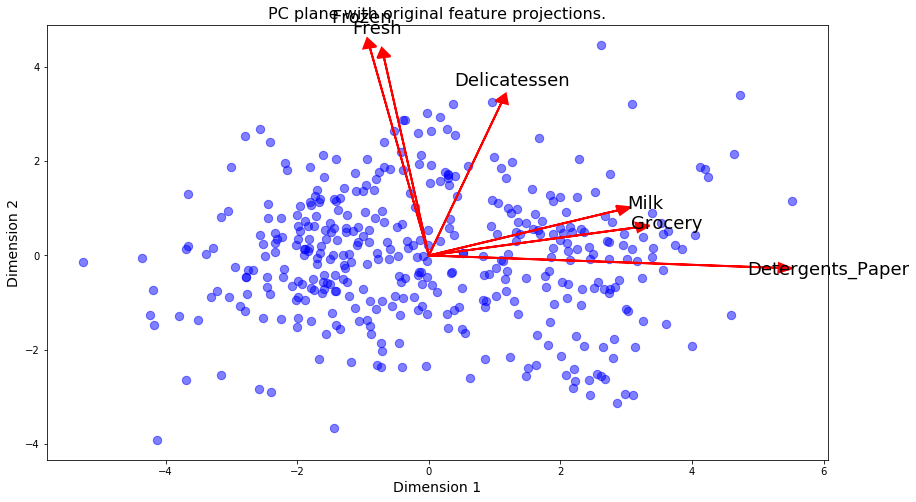

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
Advantages of using K-Means clustering: -

1. Run time complexity is significantly better than GMM
2. For the first advantage and for ease, it's better suited for data having high dimensions.
3. Very straight forward, and intuitive.
4. If we really don't know about anything about the data point, i.e. whether it belongs to either cluster (2 or more), then we can go with hard clustering.


Advantages of using Gaussian Mixture Model(GMM): -
1. Unlike K-Means, GNN doesn't assume cluster to be of circular shape, and therefore can adjust its self to elliptic shape or rather non-linear complex shapes.
2. Unlike hard clustering in KM, it uses soft clustering, that is we don't just assume that a point belongs to just one cluster. Instead based on relative weight (probability) of a cluster with respect to a point is used while deciding which cluster a point belongs to.

Intuitively I would go for GMM, given it can unearth hidden pattern and shapes. As we can see from previous analysis with respect to component analysis, we see a number of number of similarity and signigicantly high values for multiple dimensions. Clearly we can't draw straight away conclusion in this regard, therefore I would like to go for GMM.

### Comparing time complexities for both clustering algorithms

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = list(range(2,11))
print(range_n_clusters)
# For Gaussian Mixture; Looping through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.37310483949112855
For n_clusters = 3. The average silhouette_score is : 0.3173443106130112
For n_clusters = 4. The average silhouette_score is : 0.32559931570390344
For n_clusters = 5. The average silhouette_score is : 0.2900890682975211
For n_clusters = 6. The average silhouette_score is : 0.2697516325013346
For n_clusters = 7. The average silhouette_score is : 0.3533310199507475
For n_clusters = 8. The average silhouette_score is : 0.2657955087983769
For n_clusters = 9. The average silhouette_score is : 0.2947462660225504
For n_clusters = 10. The average silhouette_score is : 0.30154909174575784


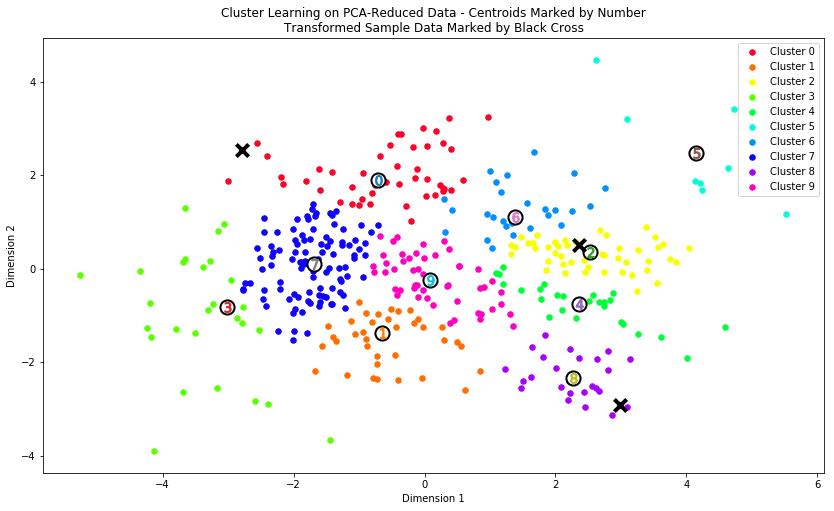

In [28]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [31]:
#For KNN; Looping through clusters
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    predsKM = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, predsKM, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.447157742293467
For n_clusters = 3. The average silhouette_score is : 0.363986479840174
For n_clusters = 4. The average silhouette_score is : 0.33115095428456565
For n_clusters = 5. The average silhouette_score is : 0.35079453877321376
For n_clusters = 6. The average silhouette_score is : 0.36276101512674497
For n_clusters = 7. The average silhouette_score is : 0.3560496466946061
For n_clusters = 8. The average silhouette_score is : 0.3759571238072808
For n_clusters = 9. The average silhouette_score is : 0.3677154450218117
For n_clusters = 10. The average silhouette_score is : 0.3485336424788402


### Comparing time complexities for both algorithms

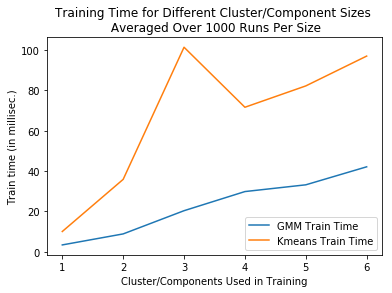

In [64]:

import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n = 1000
k = 6

kmeans_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        KMeans(n_clusters=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    kmeans_train_times.append([k, train_time])

km_df = pd.DataFrame(kmeans_train_times, columns=['KM_Clusters', 'KM_Time'])

gmm_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        GaussianMixture(n_components=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    gmm_train_times.append([k, train_time])

gmm_df = pd.DataFrame(gmm_train_times, columns=['GMM_Components', 'GMM_Time'])
times_df = km_df.join(gmm_df)

plt.plot(times_df.GMM_Components, times_df.GMM_Time * 1000., label='GMM Train Time')
plt.plot(times_df.GMM_Components, times_df.KM_Time * 1000., label='Kmeans Train Time')
plt.legend(loc='best')
plt.ylabel('Train time (in millisec.)')
plt.xlabel('Cluster/Components Used in Training')
plt.title('Training Time for Different Cluster/Component Sizes \n Averaged Over {} Runs Per Size'.format(n))
plt.show()

As can been seen from the graph above, GMM takes considerably lower time to train the same dataset

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

For n_clusters = 2. The average silhouette_score is : 0.3729412612112504
For n_clusters = 3. The average silhouette_score is : 0.34669191886559375
For n_clusters = 4. The average silhouette_score is : 0.26155996230101813
For n_clusters = 5. The average silhouette_score is : 0.24971602985279734
For n_clusters = 6. The average silhouette_score is : 0.28422366416350897
For n_clusters = 7. The average silhouette_score is : 0.3281244020839638
For n_clusters = 8. The average silhouette_score is : 0.26403285154692346
For n_clusters = 9. The average silhouette_score is : 0.32309356299691544
For n_clusters = 10. The average silhouette_score is : 0.31075628912166936
    
    The best one among these is for cluster size 2, i.e. 0.3729412612112504
    
    And similarly, for KM it is size 2, i.e.  0.447157742293467

**Answer:**


For n_clusters = 2. The average silhouette_score is : 0.3729412612112504 
For n_clusters = 3. The average silhouette_score is : 0.34669191886559375 
For n_clusters = 4. The average silhouette_score is : 0.26155996230101813 
For n_clusters = 5. The average silhouette_score is : 0.24971602985279734 
For n_clusters = 6. The average silhouette_score is : 0.28422366416350897 
For n_clusters = 7. The average silhouette_score is : 0.3281244020839638 
For n_clusters = 8. The average silhouette_score is : 0.26403285154692346 
For n_clusters = 9. The average silhouette_score is : 0.32309356299691544
For n_clusters = 10. The average silhouette_score is : 0.31075628912166936
The best one among these is for cluster size 2, i.e. 0.3729412612112504

And similarly, for KM it is size 2, i.e.  0.447157742293467

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

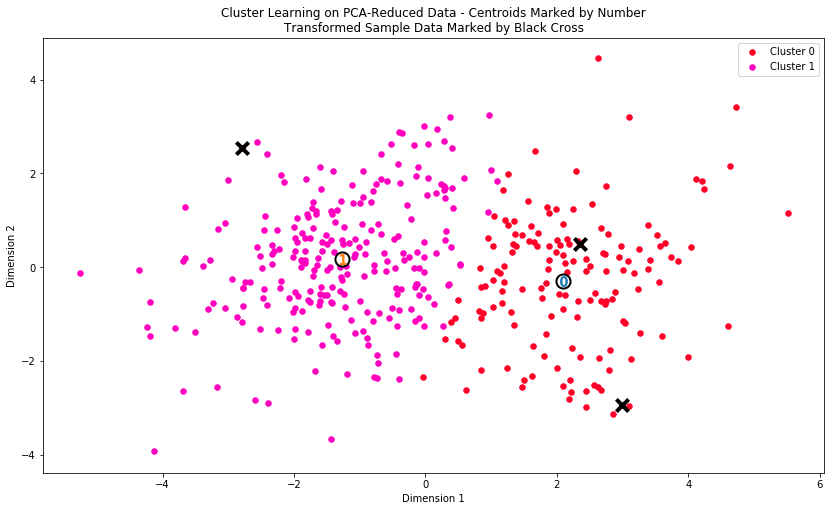

In [67]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [68]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [69]:
# Finding Clusters' deviation from median
display(true_centers - data.median())

# Clusters' deviation from mean
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3285.0,4044.0,6647.5,-447.0,3596.5,133.5
Segment 1,990.0,-1578.0,-2157.5,677.0,-479.5,-169.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-6781.297727,1874.734091,3451.722727,-1992.931818,1531.506818,-425.870455
Segment 1,-2506.297727,-3747.265909,-5353.277273,-868.931818,-2544.493182,-728.870455


**Answer:** For this answer, we will consider, as mean is sensitive to outliers, hence median would be a better choice.

Segment 0 has high values for Fresh, Frozen and Delucatessen (although on lower side, still higher than other negative ones), it can be spciality store like meat market

Segment 1 has high values for Milk, Grocery and Detergent_Paper (and slightly Delicatessen), this could be a a cafe, milk-shake parlour, or perhaps a restaurant

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [75]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
# Probability of belonging to a cluster for sample points    
for i,j in enumerate(pca_samples):
    print("Probability of Sample point {}: {}".format(i,clusterer.predict_proba([j])[0]))

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Probability of Sample point 0: [  9.99906563e-01   9.34372444e-05]
Probability of Sample point 1: [ 0.9777988  0.0222012]
Probability of Sample point 2: [  7.10346695e-05   9.99928965e-01]


In [71]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


**Answer:**
Sample 0 and 1, predicted to be in cluster 1, as both have relatively higher spending on Milk, Grocery, and Detergent_Paper. However, on sample point 1, Fresh is also higher, as well as Delcatessen, but considering on average, Milk, Grocery and Detergent paper contribute to it's probability being higher on cluster 1' side. 

Sample 2 is starkly different from previous 2 samples as it has quite low value for fresh as well as Grocery, but has higher values for Fresh and Frozen. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

As a first deduction, we can say that people whose purchased items can withstand longer or delayed delivery are more likely to accpet new changes or rather react positively. Therefore, it seem we should narrow down on that segment which has such traits, i.e. spends more on non-perishable items. Then it's wise to test waters before going on, therefore, we should choose a smaller subset from the choosen segment. 
However, may be the customers who tend buy persihable items more (than the non-perishable) would entertain the 3 days a week delivery. Therefore, we can do the same for the small subset of this second group. This will not bias out results as well.

As per the above argument, I think the segment 1, is less likely to be affected. However, having given the argument in favour of non-perishable items, we can see the segment one sample also has high spending on Milk (can expire in short time), but we can overlook this in favour of generalization, and assume that milk is preserved, as it really is the case with shelf life of tetra packs of milk, and bottled milk products./




### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

First of all we have segmented data, therefore, we can use that data to train models (SVM, Logistic Regression, Ensemble methods etc.), and we can set the target variable as our segment-label. Then we can use the test set (taken from choosen segment data), and predict as well check the accuracy of model.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

Probability of Sample 0: [  9.99906563e-01   9.34372444e-05]
Probability of Sample 1: [ 0.9777988  0.0222012]
Probability of Sample 2: [  7.10346695e-05   9.99928965e-01]


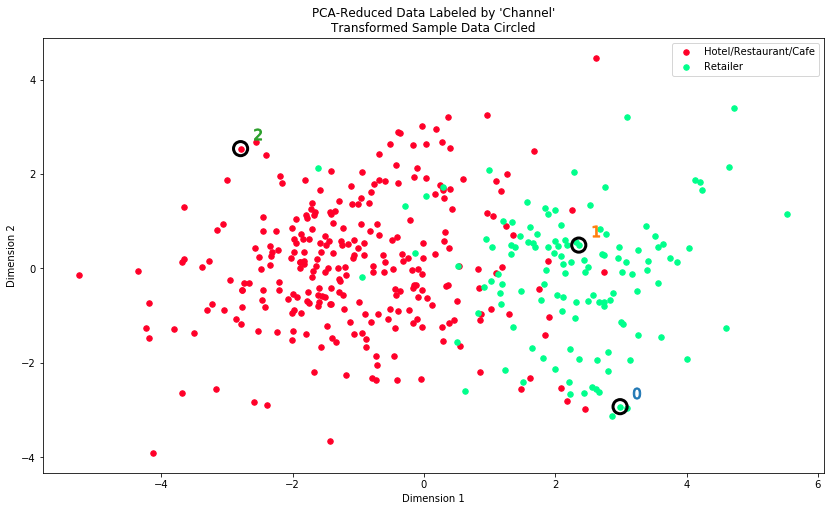

In [72]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)


channel_labels = pd.read_csv("customers.csv")["Channel"]
channel_labels = channel_labels.drop(channel_labels.index[outliers]).reset_index(drop = True) - 1
# channel_labels = abs(channel_labels -1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(channel_labels,preds)

for i,j in enumerate(pca_samples):
    print("Probability of Sample {}: {}".format(i,clusterer.predict_proba([j])[0]))

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

1. Underlying distribution seems consistent with the clustering, i.e. only two major segments.
2. Yes, there seems to be customer segments that would be classified as purely "Retailers" or "Hotels/"Restaurants/Cafes" on the extreme left and right accordingly.
3. The classification also seems consistent with our observation where cluster 1 are restaurants/cafes and cluster 0 are meat/vegetable market. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.